# 1. Data Understanding

Variables (Data with 31 columns)

Column Name | Description
---|---
Time | Number of seconds elapsed between this transaction and the first transaction in the dataset.
V1-V28 | Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28).
Amount |Transaction amount using Euro
Class |The target label: 0 = legitimate transaction, 1 = fraudulent transaction

- Time, Amount, and V1–V28 as input features.

- Class as the target variable.

# 2. Data Cleaning & Preparation

In [1]:
pip install streamlit

In [2]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
# Load the dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [4]:
# Save dataset to df
df = pd.read_csv(f"{path}/creditcard.csv")

In [5]:
# Display first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Set seed for reproducibility
np.random.seed(42)

# Select 10 random rows from df
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
260880,159763.0,2.023952,-0.120140,-1.086918,0.423019,-0.142901,-1.127752,0.178493,-0.303234,0.564509,...,-0.276175,-0.697708,0.335631,-0.017196,-0.324904,0.200023,-0.071566,-0.058224,16.99,0
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,...,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
201575,133944.0,2.119362,0.142639,-2.373337,0.541949,0.608419,-1.775564,0.955775,-0.599383,0.010420,...,0.264264,0.898266,-0.168063,0.059311,0.626949,0.729035,-0.129120,-0.094713,10.00,0
81055,58769.0,-5.584256,-4.732413,-0.448452,-0.121442,-0.707412,-0.114376,-1.554628,1.402126,-0.031693,...,0.041651,0.621789,0.223467,-0.770137,0.621182,-0.028738,0.505194,-1.898323,101.49,0


In [8]:
# Check shape
df.shape

(284807, 31)

This dataset contains:
- 284,807 rows
- 31 columns

In [9]:
# View columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Create a deep copy so that raw data is unaffected by further changes
df_copy = df.copy(deep=True)

# 3. Exploratory Data Analysis (EDA)

In [11]:
# Display a summary statistics of df
df_copy.describe().round(2) # round to 2 d.p

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


**Insight:**

- Based on count, there are 284,807 transactions/data points in the dataset.

In [12]:
df_copy['Amount'].describe().round(2) # round to 2 d.p

,Amount
count,284807.00
mean,88.35
std,250.12
min,0.00
25%,5.60
50%,22.00
75%,77.16
max,25691.16


**Insight:**

- The average transaction amount is €88, while the maximum transaction amount exceeds €25,000.

- The standard deviation is relatively high, indicating significant variability in transaction amounts / large spread in the transaction amounts.

- The smallest transaction amount is €0.00, which could be void transactions or error in data entry.

---

- 25% (€5.60): Tthe first quartile (Q1).
  - 25% of all transactions were less than or equal to €5.60.

- 50% (€22.00): The median, or second quartile (Q2).
  - Half of all transactions were less than or equal to €22.00.

  - The significant difference between the median (€22.00) and the mean (€88.35) indicates that the data is right-skewed. This means a few very large transaction amounts are pulling the average up.

- 75% (€77.16): The third quartile (Q3).  
  - Indicates that 75% of all transactions were less than or equal to €77.16.


- The mean may be skewed by a few extremely large transactions, since 50% of the transactions (median) are only around €22.

---
**Summary:**

the statistics show that most transactions are for relatively small amounts, while a small number of very large transactions greatly influence the average, leading to a skewed distribution.



In [13]:
# Display info about the df
print("DataFrame information: \nInformation of all columns")
df_copy.info()

DataFrame information: 
Information of all columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 2

Insight:
- Based on the information displayed, there are no missing value for each column.

### Univariate Analysis: Histogram

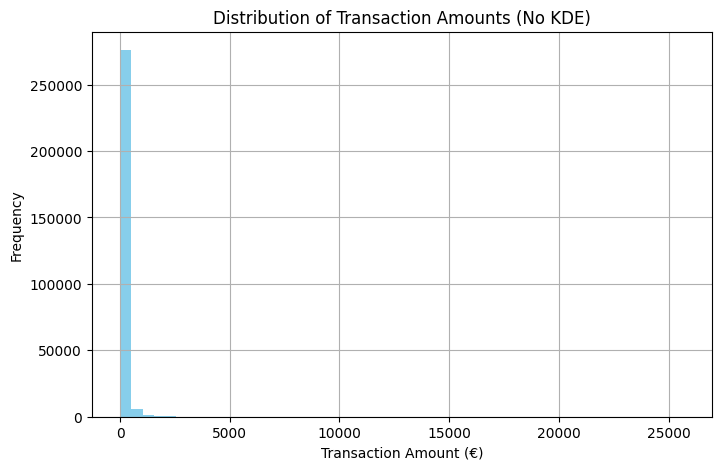

In [14]:
# Histogram plot to display transaction amounts distribution, No KDE

plt.figure(figsize=(8, 5))
plt.hist(df_copy['Amount'], bins=50, color='skyblue')

plt.title('Distribution of Transaction Amounts (No KDE)')
plt.xlabel('Transaction Amount (€)')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()


Note:
- This plot is focused on the low value range where most data lies. The purpose of this plot is to analyze the bulk of common transactions made.

- In this plot, no KDE line is used (no smoothing).
- KDE (Kernel Density Estimation Plot) / Probability density.

Insight:
- Based on the statistical summary earlier, 75% of the transactions are less than or equal to €77. This evidence is backed by the plot above, which shows the raw value counts of where the most transaction made are in the lower value range.

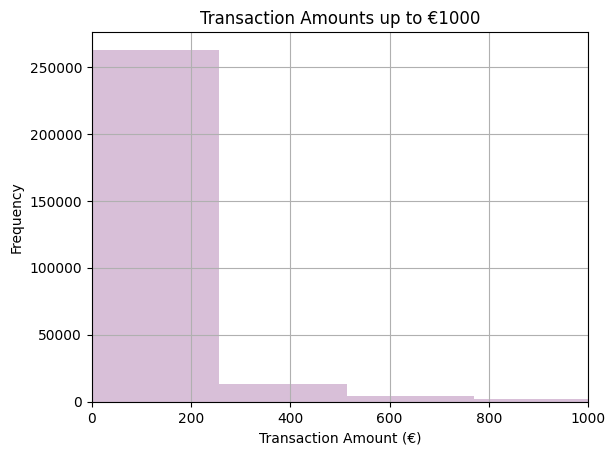

In [15]:
# Histogram plot to display closer view distribution of transaction amounts

plt.hist(df_copy['Amount'], bins=100, color='thistle')

plt.title('Transaction Amounts up to €1000')
plt.xlabel('Transaction Amount (€)')
plt.ylabel('Frequency')

plt.xlim(0, 1000) # from 0 to 1000
plt.grid(True)
plt.show()

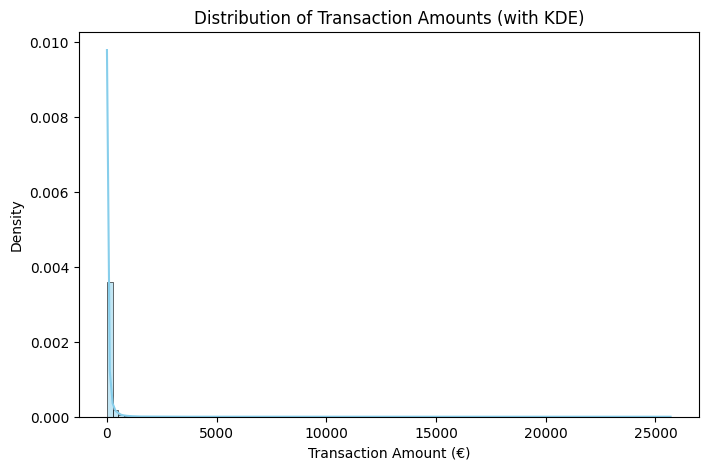

In [16]:
# Histogram plot to display distribution of transaction amounts + Full Range, with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['Amount'], bins=100, kde=True, stat='density', color='skyblue')

plt.title('Distribution of Transaction Amounts (with KDE)')
plt.xlabel('Transaction Amount (€)')
plt.ylabel('Density')

plt.show()


Note:
- This plot is shown in a full scale to understand the entire overall distribution of the transaction amount. Compared to the first plot, this plot shows all transactions from smallest to largest, with the outliers included.

- KDE line is used in this plot to help estimate where the fraud is.

- While the first plot shows the raw count of transaction being made, this plot shows the probability density.

- The most densely populated bin has a density of 0.0038 per unit (per €1).

- The KDE line peaking at 0.010 means that the KDE estimates the highest density (likelihood oer unit) to be at 0.010 at that transaction amount.

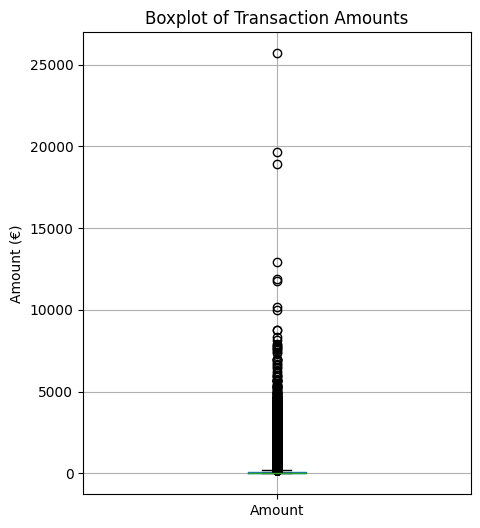

In [17]:
# Boxplot for transaction amount
plt.figure(figsize=(5, 6))
df_copy.boxplot(column='Amount')

plt.title("Boxplot of Transaction Amounts")
plt.ylabel("Amount (€)")

plt.show()

**Insight:**
- The IQR box can be seen squuezed at the bottom, once again this means that tmost values are in a low range.

- The median is also close to the bottom, confirming the skew.

- The several points on the high end my indicate possible outliers.


/tmp/ipython-input-1399530141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_copy, palette=colors)


([<matplotlib.axis.XTick at 0x79c3a1215a50>,
 [Text(0, 0, 'Non-Fraud'), Text(1, 0, 'Fraud')])

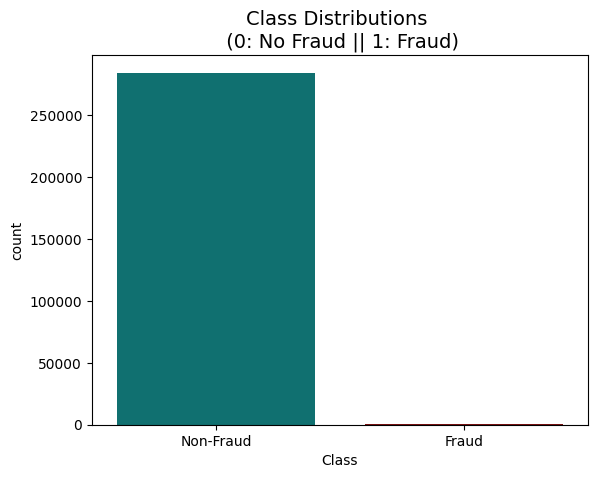

In [18]:
# Plot barplot using seaborn for Class distribution of fraud and non-fraud transaction

colors = ['teal', 'darkred']

sns.countplot(x='Class', data=df_copy, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])


**Insight:**
- This distribution shows how the features are extremely skewed and that the dataset is highly imbalanced.

- The majority of transactions are non-fraudulent (Class = 0), while fraudulent transactions (Class = 1) make up a very small portion.

- This imbalance may affect the performance of the machine learning model.

/tmp/ipython-input-1481882210.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Amount', data=df, estimator='mean', palette=colors)


([<matplotlib.axis.XTick at 0x79c3984716d0>,
 [Text(0, 0, 'Non-Fraud'), Text(1, 0, 'Fraud')])

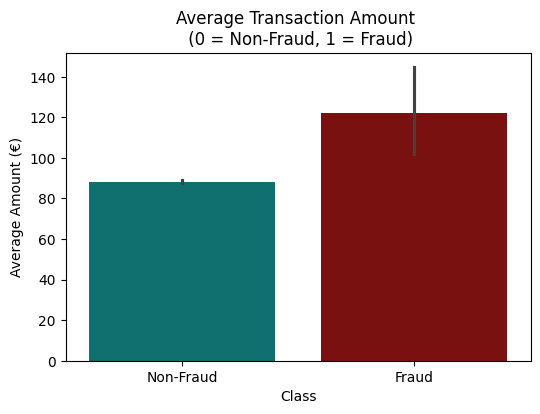

In [19]:
# Plot Barplot of average transaction amount by fraud status

colors = ['teal', 'darkred']

plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Amount', data=df, estimator='mean', palette=colors)

plt.title('Average Transaction Amount \n (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Average Amount (€)')

plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])


**Insight:**
- This plot shows the average transaction amount for each class.

- Fraudulent transactions is slightly higher in value, which may tells us that there is a high transaction made in fraud cases.

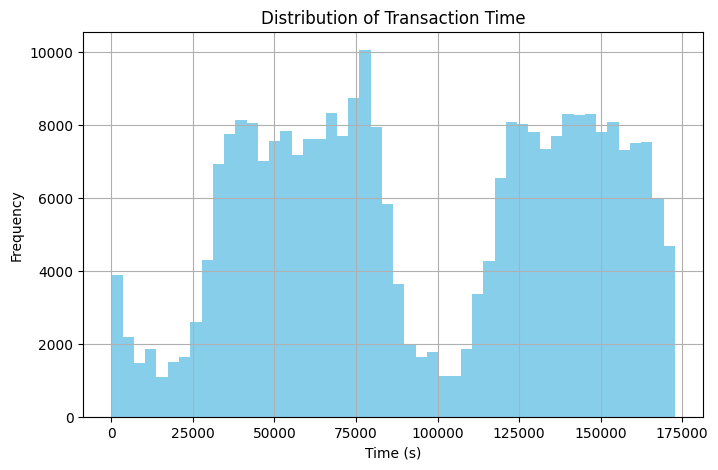

In [20]:
# Histogram plot to display transaction amounts distribution, No KDE

plt.figure(figsize=(8, 5))
plt.hist(df_copy['Time'], bins=50, color='skyblue')

plt.title('Distribution of Transaction Time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()


# 4. Feature Engineering

- Creating features from existing ones to help the model learn better:
  - Log-transform 'Amount' to reduce skew.
  - Convert 'Time' to 24-hour format.
  - Create Time_Bin for morning, afternoon, evening, night.
  ---

**Log-transform 'Amount' to reduce skew**

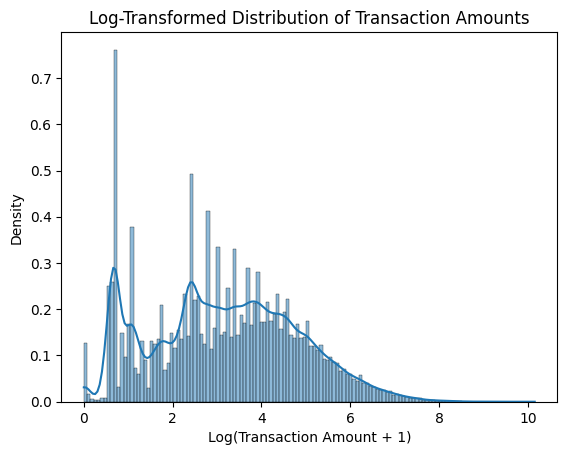

In [21]:
# Using log-transform to make the skew manageable
df_copy['Log_Amount'] = np.log1p(df_copy['Amount'])
sns.histplot(df_copy['Log_Amount'], kde=True, stat='density')

plt.title('Log-Transformed Distribution of Transaction Amounts')
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Density')

plt.show()

In [22]:
# Quick check to ensure that Log values are being used
print(df_copy['Log_Amount'].min(), df_copy['Log_Amount'].max())


0.0 10.153941165977784


Note:
- The log-transformed distribution compresses outliers so they don't influence the whole plot, and so that the models can see the distribution more fairly.

- Small transaction with low amounts get transformed into numbers close to 0 on the log scale.

- Transactions with large amounts get transformed into bigger numbers on the log scale.

Bigger transaction = higher log values.

**Converting 'Time' to 24-hours format**

In [23]:
# Convert seconds to 24 hours format for all values in column 'Time'
df_copy['Hour'] = (df_copy['Time'] % 86400) // 3600

Note:
- Time is the number of seconds since the first recorded transaction.

- Time = 0 is the first transaction.

- 1 min = 60s
- 1 hour = 60 mins x 60s = 3600s
- 1 day = 24 hours x 3600s = 86,400s




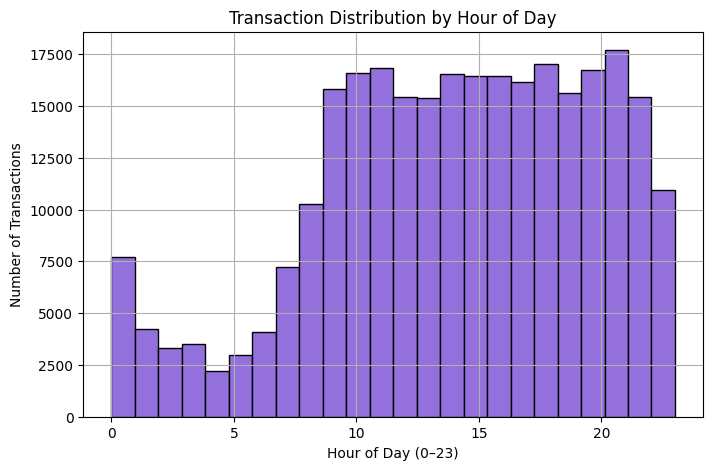

In [24]:
# Histogram plot to display transaction distribution by hour of day

plt.figure(figsize=(8, 5))
plt.hist(df_copy['Hour'], bins=24, color='mediumpurple', edgecolor='black') # 24 bins for 24 hours, values will fall into one of the 24 bins

plt.title('Transaction Distribution by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Transactions')

plt.grid(True)
plt.show()

**Insight:**
- The time just before or after 12AM may suggest quieter periods of the day, such as late night or off-peak hours as the bar is lower.

- Tall peaks can be seen throughout the day from 10AM to 10PM

In [25]:
# Categorizing transaction into time period (Night, Morning, Afternoon, Evening)

def time_of_day(hour):
    if 0 <= hour <= 6: # Night: 0-6
        return 'Night'
    elif 7 <= hour <= 12: # Morning: 7-12
        return 'Morning'
    elif 13 <= hour <= 18: # Afternoon: 13-18
        return 'Afternoon'
    else:
        return 'Evening' # Evening: 19-23

df_copy['Time_Bin'] = df_copy['Hour'].apply(time_of_day)

% 86400 → keeps the seconds within a single day (since 86400 seconds = 24 hours).

// 3600 → converts seconds into whole hours.

So if Time = 37,000 seconds:

- 37,000 % 86,400 = 37,000 (still same day)
- 37,000 // 3600 = 10 → 10 AM

**Time bin for morning, afternoon, evening, night**

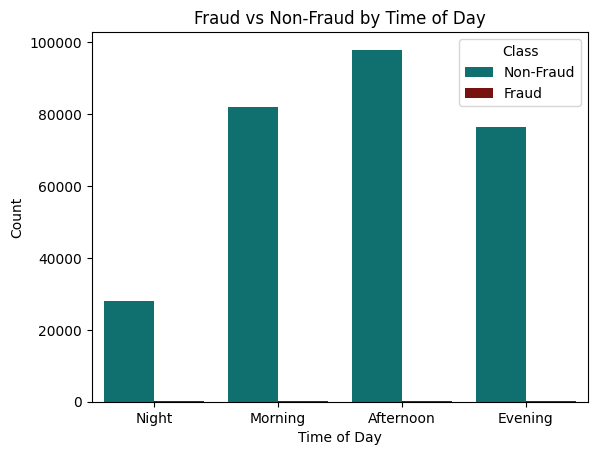

In [26]:
# Plot count of fraud vs non-fraud transactions by time of day

colors = ['teal', 'darkred']

sns.countplot(x='Time_Bin', data=df_copy, hue='Class', palette=colors)
plt.title('Fraud vs Non-Fraud by Time of Day')

plt.xlabel('Time of Day')
plt.ylabel('Count')

plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.show()


**Insight:**
- There are fraud transactions made in every time of the day.

In [27]:
# Checking the current df for the dataset
df_copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Log_Amount,Hour,Time_Bin
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.0,Night
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,0.0,Night
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,0.0,Night
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.0,Night
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,0.0,Night


In [28]:
# Checking for missing values prior to resampling
missing_value_counts = df_copy.isnull().sum()
missing_value_counts

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Insight:**
This dataset is free of missing value, the dataset is complete.

In [29]:
# Check current class distribution
df_copy['Class'].value_counts()

,count
Class,
0,284315
1,492


- 0 → 284,315 → normal (non-fraud) transactions

- 1 → 492 → fraudulent transactions


In [30]:
# Fraud and non-fraud counts by percentage
fraud_counts = df_copy['Class'].value_counts()
total = len(df_copy)

print(f"Non-Fraud: {fraud_counts[0]} ({fraud_counts[0]/total:.2%})")
print(f"Fraud:     {fraud_counts[1]} ({fraud_counts[1]/total:.2%})")

Non-Fraud: 284315 (99.83%)
Fraud:     492 (0.17%)


# 5. Feature Scaling / Normalization

**Note:** Since the dataset is heaviliy imbalanced, oversampling will be needed to be done.

In [31]:
from sklearn.preprocessing import StandardScaler

# Creating feature scaling for Amount and Time
std_scaler = StandardScaler()

# Scale log-transformed Amount
df_copy['scaled_Log_Amount'] = std_scaler.fit_transform(
    df_copy['Log_Amount'].values.reshape(-1, 1)
)

# Scale Time: Convert the 'Time' (hours 0-23) into radians. Helper column so that sin_hour and cos_hour can be calc
df_copy['Hour_in_radians'] = 2 * np.pi * df_copy['Hour'] / 24

# Apply sine and cosine transformations
df_copy['sin_Hour'] = np.sin(df_copy['Hour_in_radians'])
df_copy['cos_Hour'] = np.cos(df_copy['Hour_in_radians'])

df_copy.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,Class,Log_Amount,Hour,Time_Bin,scaled_Log_Amount,Hour_in_radians,sin_Hour,cos_Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,149.62,0,5.014760,0.0,Night,1.124303,0.0,0.0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,2.69,0,1.305626,0.0,Night,-1.114639,0.0,0.0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.059752,378.66,0,5.939276,0.0,Night,1.682368,0.0,0.0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,123.50,0,4.824306,0.0,Night,1.009339,0.0,0.0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,69.99,0,4.262539,0.0,Night,0.670241,0.0,0.0,1.0


# 6. Train/Test Split

In [32]:
df_trainTest = df_copy.copy(deep=True)
df_trainTest.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,Class,Log_Amount,Hour,Time_Bin,scaled_Log_Amount,Hour_in_radians,sin_Hour,cos_Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,149.62,0,5.014760,0.0,Night,1.124303,0.0,0.0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,2.69,0,1.305626,0.0,Night,-1.114639,0.0,0.0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.059752,378.66,0,5.939276,0.0,Night,1.682368,0.0,0.0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,123.50,0,4.824306,0.0,Night,1.009339,0.0,0.0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,69.99,0,4.262539,0.0,Night,0.670241,0.0,0.0,1.0


In [33]:
# Drop irrelevant columns
df_trainTest.drop(['Time', 'Hour', 'Time_Bin', 'Amount', 'Log_Amount', 'Hour_in_radians'], axis=1, inplace=True)
df_trainTest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_Log_Amount,sin_Hour,cos_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.124303,0.0,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.114639,0.0,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.682368,0.0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.009339,0.0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670241,0.0,1.0


Split input features and target

In [34]:
X = df_trainTest.drop(columns=['Class'])
y = df_trainTest['Class']

In [35]:
# Preview input features
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_Log_Amount,sin_Hour,cos_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.124303,0.0,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.114639,0.0,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.682368,0.0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.009339,0.0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670241,0.0,1.0


In [36]:
# Preview target
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [37]:
# Split training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Note:**
- Use stratify y to keep the fraud/non-fraud ratio consistent.

**Resampling**

Note:
- Since the dataset is highly imbalanced, the dataset may cause overfitting ot wrong correlation when it undergoes the ML model.

- **Overfitting:**
  - The classification model may assume that there are no fraud cases.

- Wrong correlations:
  - We currently do not know what 'V' features stand for, but it will be useful to understand how each of the features can influence the result (fraud and non-fraud). By having an imbalance dataset, the true correlations between the class and features may be difficult to see.

In [38]:
# Apply SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE

# Resample data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Applying Logistic Regression to the dataset

In [39]:
# Import LR model from scikit-learn; SV learning algo used for binary classification (fraud vs not fraud)
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression object model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train model using the resampled training data
model.fit(X_train_res, y_train_res)

# X_train_res: features after oversampling with SMOTE
# y_train_res: target variable (0 = normal, 1 = fraud)


LogisticRegression(max_iter=1000, random_state=42)

**Note:**
- The default iteration is 100, which is too low and the model doesn't converge. So set iteration to 1000.



```
model.fit(X_train_res, y_train_res)
```

1. **fit:** SMOTE “learns” which class is minority (fraud) and how to create synthetic examples.

2. **resample:** SMOTE generates new synthetic fraud samples so that minority and majority classes are balanced.

---

X_train_res → new training features after adding synthetic fraud rows

y_train_res → new training labels after adding synthetic fraud labels

Evaluate on test set

In [40]:
# Import evaluation metrics
from sklearn.metrics import classification_report, roc_auc_score

# Predict fraud vs non-fraud using the trained model; returns 0 or 1
y_pred = model.predict(X_test)

# Get predicted probabilities instead of hard labels
y_pred_prob = model.predict_proba(X_test)[:, 1] # select all rows from column 1 (fraud)

# Print classification report
print(classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_pred_prob)) # uses y_pred_prob because ROC AUC requires probabilities, not hard labels.


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962


ROC AUC: 0.9707140488440733


**Notes:**

- Precision = among predicted frauds, how many were correct.
- Recall = among actual frauds, how many were caught.
- F1-score = balance of precision & recall.
- Support = how many samples in each class.
- ROC AUC score (ranges 0.5 = random, 1.0 = perfect).


**Insight:**

**1. Class 0 (non-fraud)**

- precision = 1.00 → Every transaction predicted as non-fraud was actually non-fraud.
- recall = 0.97 → Model correctly caught 97% of all non-fraud transactions.
-f1-score = 0.99 → High overall accuracy for non-fraud.
- support = 56,864 → There are 56,864 non-fraud transactions in the test set.

**2. Class 1 (fraud)**

- precision = 0.05 → Only 5% of transactions predicted as fraud were actually fraud (many false positives).
- recall = 0.91 → Model correctly identified 91% of all actual fraud transactions (good).
- f1-score = 0.10 → Low because precision is very low, despite high recall.
- support = 98 → There are 98 fraud transactions in the test set.

Summary:
- The model is very good at detecting non-fraud because it catches most frauds (recall = 0.91), but the precision is bad because many normal transactions are flagged as fraud (which is false positive).
- F1-score = 0.10 reflects the imbalance between precision & recall.


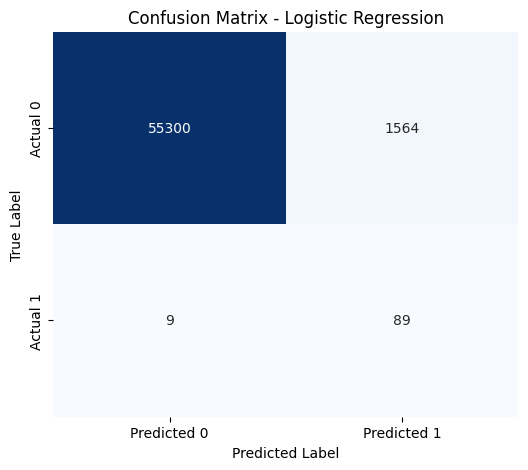


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print(f"\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

**Note:**

- **True Negatives (TN)**: Model correctly predicted class 0
- **False Positives (FP)**: Model predicted 1 but it was actually 0
- **False Negatives (FN)**: Model predicted 0 but it was actually 1
- **True Positives (TP)**: Model correctly predicted class 1


**Insight:**

1. **True Negatives (TN) = 55300**
  - Non-fraud transactions (class 0) that were correctly predicted as non-fraud.

2. **False Positives (FP) = 1564**
    - Non-fraud transactions that the model incorrectly flagged as fraud.
    - A Type I error.

3. **False Negatives (FN) = 9**
    - Fraud transactions (class 1) that the model missed, predicted as non-fraud.
    - A Type II error.

4. **True Positives (TP) = 89**
  - Fraud transactions correctly identified by the model.



In [41]:
pip install xgboost

In [48]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method='hist',
        eval_metric='logloss',
        use_label_encoder=False,
        n_jobs=-1,
        random_state=42
    )
}

scores = []

for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Store ROC AUC
    scores.append({
        'model': model_name,
        'test_roc_auc': roc_auc_score(y_test, y_pred_prob)
    })


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:44:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [47]:
# View results
df_scores = pd.DataFrame(scores)
df_scores = df_scores[['model', 'test_roc_auc']]
print(df_scores)

           model  test_roc_auc
0  Random Forest      0.952771
1        XGBoost      0.976853



🔹 Training Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



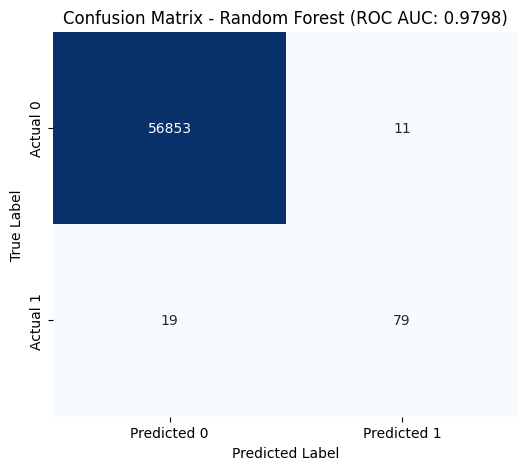


🔹 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:45:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.91      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.95      0.66     56962
weighted avg       1.00      0.99      1.00     56962



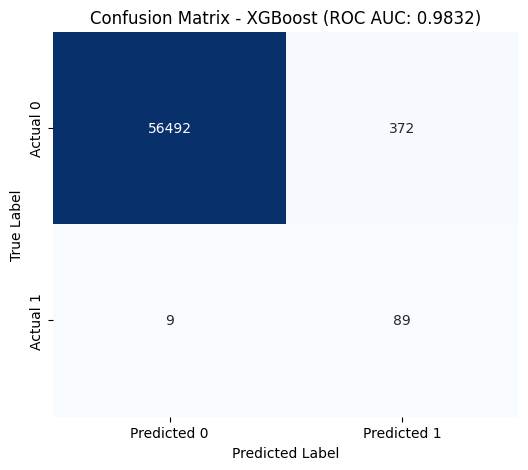


Model ROC AUC Scores:
           model  test_roc_auc
0  Random Forest      0.979761
1        XGBoost      0.983158


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Dictionary to store results
scores = []

# Loop through models
for model_name, model in models.items():
    print(f"\n🔹 Training {model_name}...")

    # Train the model
    model.fit(X_train_res, y_train_res)

    # Predict
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Store in results
    scores.append({'model': model_name, 'test_roc_auc': roc_auc})

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name} (ROC AUC: {roc_auc:.4f})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Final summary table
df_scores = pd.DataFrame(scores)
print("\nModel ROC AUC Scores:")
print(df_scores)
